# WeatherPy
----

## Katie's Analysis

* The longer arm of the curve where latitude is positive can likely be explained by more cities being north of the equator as it includes the whole of North America, Europe, Asia, and about a third of Africa, whereas south of the equator encompasses South America, the rest of Africa, and Australia. I am doubtful that OpenWeather includes any cities in Antarctica ([they only seem to be identified as research stations](https://en.wikipedia.org/wiki/Research_stations_in_Antarctica)).
* Cloudiness has clear bands at seemingly round numbers (0, 20, 40, 75, 90, 100). [While there is a unit to measure cloudiness](https://en.wikipedia.org/wiki/Okta), it does not seem to be used here and I wonder if this is because cloudiness is a value chosen based on conditions as opposed to being 'measured' in the way temperature, windspeed, or humidity can be. 
* There is not a strong relationship between latitude and wind speed or humidity. I would be curious to compare those against altitude, as I think it may have a stronger correlation with conditions that affect wind speed or humidity. 


---

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
from pprint import pprint
from datetime import datetime


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

579

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

url="http://api.openweathermap.org/data/2.5/weather?"
units="Imperial"

measured_cities = []
temp = []
humidity = []
clouds = []
windspeed = []
lats = []


for city in cities:
    
    query_url = f"{url}appid={api_key}&units={units}&q="
    try:
        city_url = (query_url+city).replace(" ", "%20")
        response = requests.get(city_url).json()
        measured_cities.append(response["name"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        lats.append(response["coord"]["lat"])
        print(f"Processing #{(cities.index(city)+1)}: {city}, information @ {city_url}")
        
        
    except:
        print(f"Processing #{(cities.index(city)+1)}:{city}, NO DATA FOUND @ {city_url} \n Moving on to next record... ")



Processing #1: freeport, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=freeport
Processing #2: albany, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=albany
Processing #3: ushuaia, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=ushuaia
Processing #4: arraial do cabo, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=arraial%20do%20cabo
Processing #5: busselton, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=busselton
Processing #6: kahului, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=kahului
Processing #7: sebeta, information @ http://api.openweathermap.org/data/2.5/weathe

Processing #54: bonfim, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=bonfim
Processing #55: cap malheureux, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=cap%20malheureux
Processing #56: paka, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=paka
Processing #57: henties bay, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=henties%20bay
Processing #58: hammerfest, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=hammerfest
Processing #59: upernavik, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=upernavik
Processing #60: tuktoyaktuk, information @ http://api.openweathermap.org

Processing #107: santa isabel do rio negro, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=santa%20isabel%20do%20rio%20negro
Processing #108: new norfolk, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=new%20norfolk
Processing #109: taos, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=taos
Processing #110: hambantota, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=hambantota
Processing #111: atuona, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=atuona
Processing #112: craig, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=craig
Processing #113: butaritari, information @ htt

Processing #160: victoria, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=victoria
Processing #161: port lavaca, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=port%20lavaca
Processing #162:vaitupu, NO DATA FOUND @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=vaitupu 
 Moving on to next record... 
Processing #163: san andres, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=san%20andres
Processing #164: ahipara, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=ahipara
Processing #165: carnarvon, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=carnarvon
Processing #166: mae sai, information 

Processing #213: nikolskoye, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=nikolskoye
Processing #214: mogadishu, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=mogadishu
Processing #215: oranjestad, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=oranjestad
Processing #216: norden, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=norden
Processing #217: thinadhoo, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=thinadhoo
Processing #218: moose factory, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=moose%20factory
Processing #219: longyearbyen, information @ http://api.openwe

Processing #266: maldonado, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=maldonado
Processing #267: boddam, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=boddam
Processing #268: lebu, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=lebu
Processing #269: bartica, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=bartica
Processing #270: terrace bay, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=terrace%20bay
Processing #271: kasongo, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=kasongo
Processing #272: ormara, information @ http://api.openweathermap.org/data/2.5/weather?ap

Processing #318: sandanski, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=sandanski
Processing #319: surt, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=surt
Processing #320: ha giang, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=ha%20giang
Processing #321: dudinka, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=dudinka
Processing #322: valdivia, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=valdivia
Processing #323: sept-iles, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=sept-iles
Processing #324: rongcheng, information @ http://api.openweathermap.org/data/2.5/weath

Processing #372: chyhyryn, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=chyhyryn
Processing #373: saint-joseph, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=saint-joseph
Processing #374: barhi, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=barhi
Processing #375: prabumulih, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=prabumulih
Processing #376: chicama, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=chicama
Processing #377: faanui, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=faanui
Processing #378: champerico, information @ http://api.openweathermap.org/data/2.5/

Processing #425: el tigre, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=el%20tigre
Processing #426: hermosillo, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=hermosillo
Processing #427:haibowan, NO DATA FOUND @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=haibowan 
 Moving on to next record... 
Processing #428: horasan, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=horasan
Processing #429: los llanos de aridane, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=los%20llanos%20de%20aridane
Processing #430:rawannawi, NO DATA FOUND @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=rawannawi 
 Moving on

Processing #479: bratsk, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=bratsk
Processing #480:fort saint john, NO DATA FOUND @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=fort%20saint%20john 
 Moving on to next record... 
Processing #481: najran, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=najran
Processing #482: tyukhtet, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=tyukhtet
Processing #483: port hardy, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=port%20hardy
Processing #484: komsomolskiy, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=komsomolskiy
Processing #485: faget, in

Processing #531:tabiauea, NO DATA FOUND @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=tabiauea 
 Moving on to next record... 
Processing #532: quincy, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=quincy
Processing #533: paamiut, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=paamiut
Processing #534: valle del guamuez, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=valle%20del%20guamuez
Processing #535: zhigansk, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=zhigansk
Processing #536: honningsvag, information @ http://api.openweathermap.org/data/2.5/weather?appid=c8012efdd8431b78b1c89011749ba745&units=Imperial&q=honningsvag
Processing #537: te anau, in

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data = pd.DataFrame({"City": measured_cities,
                        "Maximum Temperature": temp, 
                        "Humidity": humidity ,
                        "Clouds": clouds ,
                        "Wind Speed": windspeed,
                        "Latitude": lats}
                        )

city_data

,City,Maximum Temperature,Humidity,Clouds,Wind Speed,Latitude
0,Freeport,74.39,59,92,6.31,26.54
1,Albany,64.99,59,75,12.75,42.65
2,Ushuaia,42.80,87,75,27.51,-54.81
3,Arraial do Cabo,73.94,86,0,5.19,-22.97
4,Busselton,64.00,45,31,9.04,-33.64
5,Kahului,80.01,73,75,16.11,20.89
6,Sebeta,59.00,77,75,3.36,8.91
7,Bredasdorp,51.80,93,100,3.36,-34.53
8,Punta Arenas,48.20,81,20,23.04,-53.16
9,Inhambane,67.04,96,0,2.73,-23.87


In [5]:
city_data.to_csv("Current_City_Weather_Data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

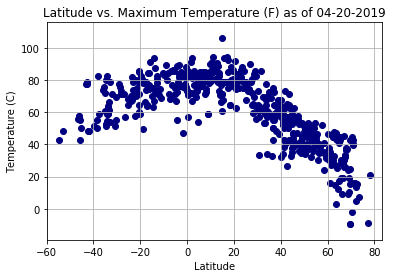

In [6]:
x = city_data["Latitude"]
temperatures = city_data["Maximum Temperature"]
date = datetime.today().strftime('%m-%d-%Y')

plt.scatter(x,temperatures,color="navy")
plt.grid()
plt.title(f"Latitude vs. Maximum Temperature (F) as of {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.ylim((min(temperatures)-10),(max(temperatures)+10))
plt.xlim((min(x)-5),(max(x)+5))
plt.savefig("lat_vs_temp.png")

#### Latitude vs. Humidity Plot

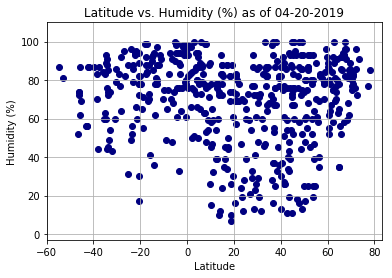

In [7]:
x = city_data["Latitude"]
humidities = city_data["Humidity"]

plt.scatter(x,humidities,color="navy")
plt.grid()
plt.title(f"Latitude vs. Humidity (%) as of {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim((min(humidities)-10),(max(humidities)+10))
plt.xlim((min(x)-5),(max(x)+5))
plt.savefig("lat_vs_humidity.png")

#### Latitude vs. Cloudiness Plot

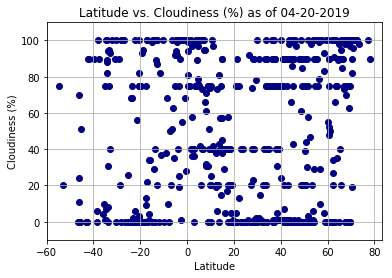

In [8]:
x = city_data["Latitude"]
cloudiness = city_data["Clouds"]

plt.scatter(x,cloudiness,color="navy")
plt.grid()
plt.title(f"Latitude vs. Cloudiness (%) as of {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim((min(cloudiness)-10),(max(cloudiness)+10))
plt.xlim((min(x)-5),(max(x)+5))
plt.savefig("lat_vs_cloudiness.png")

#### Latitude vs. Wind Speed Plot

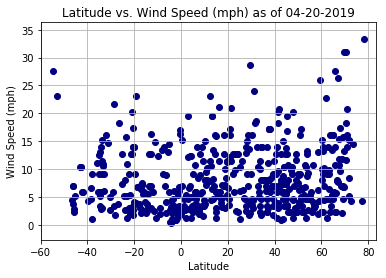

In [9]:
x = city_data["Latitude"]
wind = city_data["Wind Speed"]

plt.scatter(x,wind,color="navy")
plt.grid()
plt.title(f"Latitude vs. Wind Speed (mph) as of {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim((min(wind)-3),(max(wind)+3))
plt.xlim((min(x)-5),(max(x)+5))
plt.savefig("lat_vs_windspeed.png")